<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Machine Learning Cơ Bản</b></h1></center>

<center>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">K-Nearest Neighbors (KNN)</h1>
</center>

<h3>Ý tưởng:</h3>

Ý tưởng rất đơn giản, đó là trong nhiều nhóm đối tượng thì mình xem coi mình gần (hay hiểu nôm na là quen biết) với nhiều đối tượng trong một nhóm nào đó nhất thì coi như mình thuộc nhóm đó. KNN thường được áp dụng cho bài toán phân loại (classification)

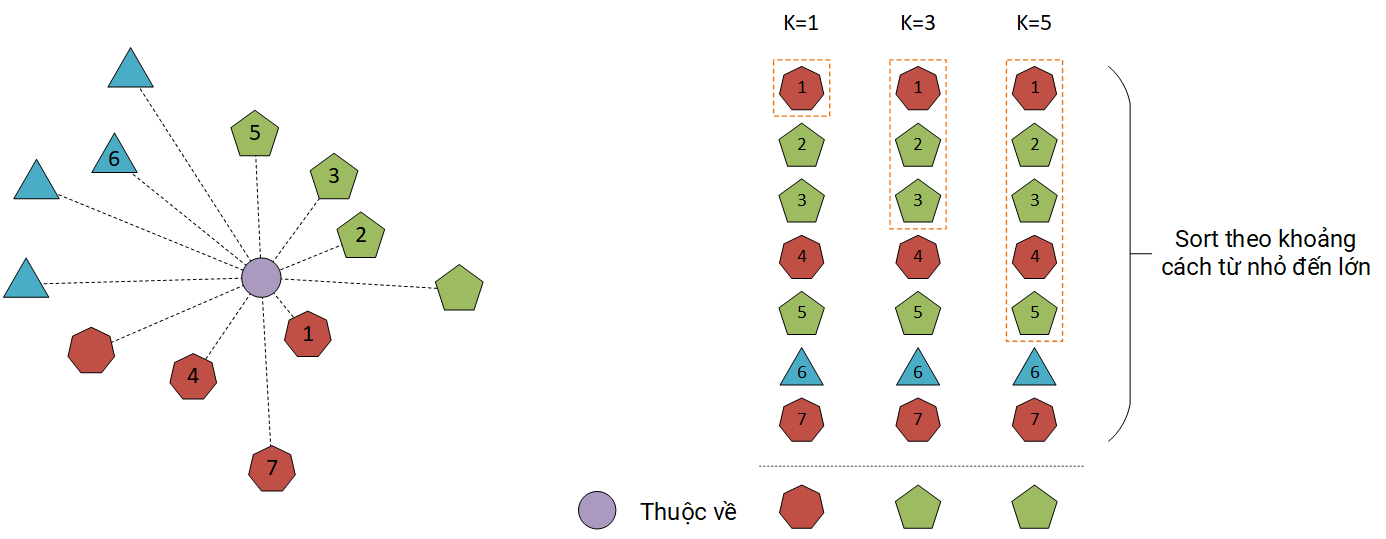

<h4>Các bước thực hiện:</h4>

Giả định, đầu tiên ta có một tập dữ liệu $X\_train$. Sau đó, chọn một tube dữ liệu từ tập $X\_test$ gọi là $x^*$:

- Tính khoảng cách của $x^*$ với tất cả các phần tử $x_i$ trong tập $X\_train$
- Sắp xếp các khoảng cách này theo thứ tự tăng dần (từ nhỏ đến lớn)
- Lấy ra $k$ khoảng cách đầu tiên (nearest)
- Đếm số lần xuất hiện của các label tương ứng với $k$ khoảng cách đầu tiên đó. Cái label nào xuất hiện nhiều hơn thì chọn

<h3>Tính khoảng cách</h3>

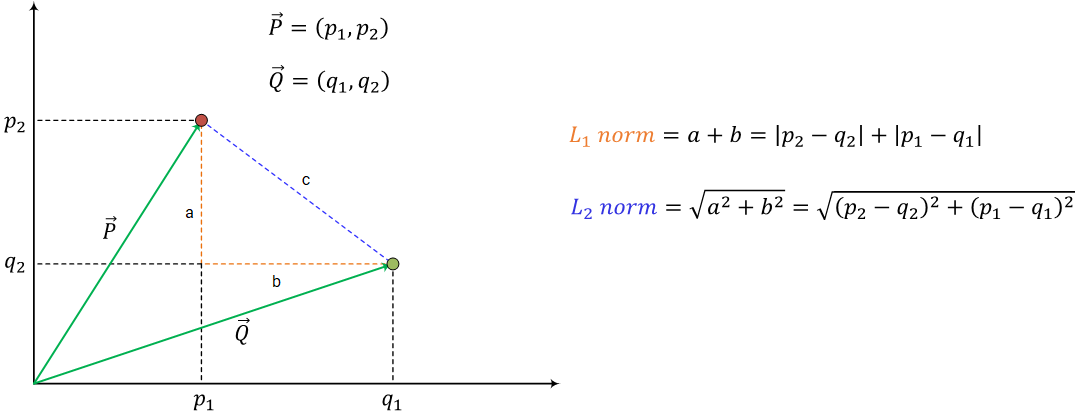

Tổng quát: cho $\overrightarrow{P} = (p_1,p_2,\cdots,p_n)$ và $\overrightarrow{Q} = (q_1, q_2, \cdots, q_n)$

$$
\Large L_1 \;norm=\sum_{i=1}^n \mid p_i - q_i \mid  \tag{Manhattan distance}
$$

$$
\Large L_2 \;norm=\sqrt{\sum_{i=1}^n (p_i - q_i)^2} \tag{Euclidean distance}
$$

$$
\Large L_k \;norm=\sqrt[\leftroot{5}\uproot{-3}{k}]{\sum_{i=1}^n (\mid p_i - q_i\mid)^k}=\biggl[{\sum_{i=1}^n (\mid p_i - q_i\mid)^k}\biggr]^{\frac{1}{k}}
$$

In [13]:
import numpy as np
import math
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split

<h3>Tính L1 và L2 norm</h3>

In [14]:
x_star = np.array([1, 5, 4, 3])
x_0 = np.array([4, 1, 2, 8])

<h4>Tính bằng vòng lặp</h4>

In [15]:
l1_distance = 0
l2_distance = 0

for i in range(len(x_star)):
    l1_distance += abs(x_star[i] - x_0[i]) # math.fabs(), np.abs()
    l2_distance += (x_star[i] - x_0[i]) ** 2

l2_distance = math.sqrt(l2_distance) # np.sqrt()
print(f"L1={l1_distance} | L2={l2_distance}")

L1=14 | L2=7.3484692283495345


<h4>Tính bằng Vectorized</h4>

In [16]:
l1_distance_vec = np.sum(np.abs(x_star - x_0))
l2_distance_vec = np.sqrt(np.sum((x_star - x_0) ** 2))
print(f"L1={l1_distance_vec} | L2={l2_distance_vec}")

L1=14 | L2=7.3484692283495345


In [17]:
print(x_star - x_0)
print(np.abs(x_star - x_0))
print(np.power((x_star - x_0), 2))

[-3  4  2 -5]
[3 4 2 5]
[ 9 16  4 25]


<h3>Viết code cho thuật toán KNN</h3>

In [ ]:
class ViiKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        No train data here. 
        It's just memorized all features data and labels

        Parameters:
            X (numpy.ndarray(m, n)) : Features data
            y (numpy.ndarray(m,)) : Labels data
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        """
        Parameters:
            X_test (numpy.ndarray(m, n)) : Features data

        Return:
            preds (list[int]) : List of predicted label
        """
        preds = []
        for i, x in enumerate(X_test):
            print(f"x_test_{i}: {x}")
            preds.append(self._predict_one(x))
        return preds
        
        
    def _euclidean_distance(self, p, q):
        """
        Aka. L2 norm
        
        Parameters:
            p (numpy.ndarray(m,))
            q (numpy.ndarray(m,))

        Return:
            L2 norm value (scalar) of 2 vectors p, q
        """
        return np.sqrt(np.sum((p - q) ** 2))

    def _manhattan_distance(self, p, q):
        """
        Aka. L1 norm
        
        Parameters:
            p (numpy.ndarray(m,))
            q (numpy.ndarray(m,))

        Return:
            L1 norm value (scalar) of 2 vectors p, q
        """
        return np.sum(np.abs(p - q))

    def _predict_one(self, x):
        """
        Parameters:
            x (numpy.ndarray(m,)) : a tube data in X_test

        Return:
            most_common[0][0] (int) : The label which is the most common label in the k nearest
        """
        # Compute L2 distance between x and all data in X_train
        _distances = [self._euclidean_distance(x, x_i) for x_i in self.X_train]

        # Sort all distances by ascending and get the indice of top k
        # np.argsort(): sort the value and return the index of the sorted value
        k_indice = np.argsort(_distances)[:self.k]

        # Loop through the k_indice list and get the label respectively
        k_nearest_labels = []
        k_nearest_distances = []
        for i in k_indice:
            k_nearest_labels.append(self.y_train[i])
            k_nearest_distances.append(_distances[i])    
        
        most_common = Counter(k_nearest_labels).most_common()

        print(f"Distances: {np.round(_distances, 3)}")
        print(f"The {self.k} nearest distances: {np.round(k_nearest_distances, 3)}")
        print(f"The {self.k} nearest indice: {k_indice}")
        print(f"The {self.k} nearest labels: {k_nearest_labels} | Label value count: {most_common} | Nearest label: {most_common[0][0]}\n")
        
        return most_common[0][0]

In [ ]:
 0   1   2   3   4
[60, 20, 10, 50, 80]


sorted [10, 20, 50, 60, 80] 
=> index [2, 1, 3, 0, 4]

==> k_indice = [2, 1, 3]

<h3>Load dữ liệu, train và test</h3>

In [18]:
# Load iris data set from sklearn
iris = datasets.load_iris()

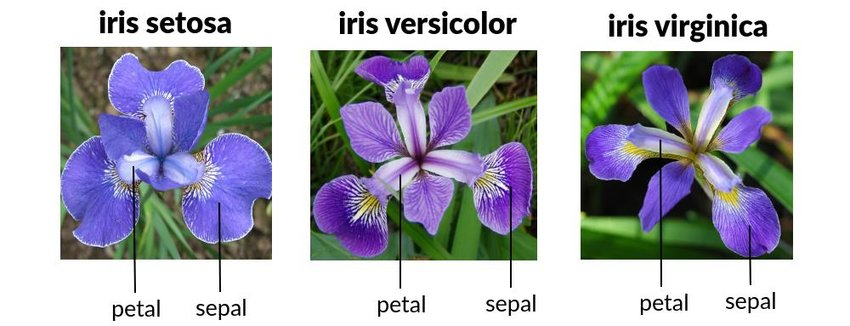

https://www.researchgate.net/figure/Three-classes-of-IRIS-dataset-for-classification-17_fig2_349634676

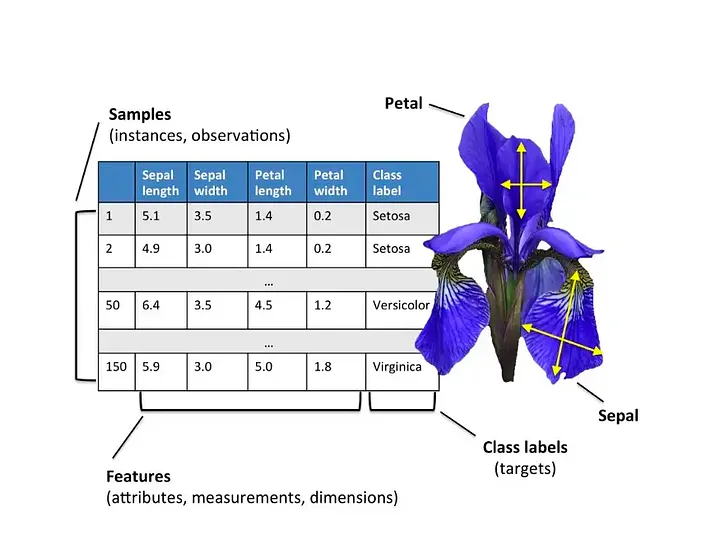

https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c

In [19]:
X_data = iris.data # X features
y_data = iris.target # y label
print(iris.feature_names)
print(X_data[0:5])
print("-"*50)
print(iris.target_names)
print(y_data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
--------------------------------------------------
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2024)

In [20]:
print(X_test[0:5])

[[5.8 4.  1.2 0.2]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]]


In [21]:
m = math.ceil(len(y_train)/2)
for i in range(m):
    j = i + m
    print(f"{i} -> {y_train[i]} | " + (f"{j} -> {y_train[j]}" if j < len(y_train) else ""))

0 -> 0 | 53 -> 2
1 -> 1 | 54 -> 0
2 -> 0 | 55 -> 1
3 -> 1 | 56 -> 1
4 -> 0 | 57 -> 0
5 -> 0 | 58 -> 0
6 -> 1 | 59 -> 2
7 -> 0 | 60 -> 2
8 -> 1 | 61 -> 2
9 -> 2 | 62 -> 0
10 -> 1 | 63 -> 0
11 -> 0 | 64 -> 0
12 -> 0 | 65 -> 2
13 -> 1 | 66 -> 2
14 -> 1 | 67 -> 1
15 -> 2 | 68 -> 0
16 -> 2 | 69 -> 2
17 -> 0 | 70 -> 2
18 -> 2 | 71 -> 1
19 -> 2 | 72 -> 0
20 -> 0 | 73 -> 1
21 -> 1 | 74 -> 2
22 -> 2 | 75 -> 1
23 -> 1 | 76 -> 2
24 -> 1 | 77 -> 0
25 -> 1 | 78 -> 1
26 -> 1 | 79 -> 0
27 -> 2 | 80 -> 0
28 -> 1 | 81 -> 2
29 -> 0 | 82 -> 1
30 -> 1 | 83 -> 2
31 -> 1 | 84 -> 1
32 -> 2 | 85 -> 2
33 -> 0 | 86 -> 1
34 -> 0 | 87 -> 0
35 -> 1 | 88 -> 1
36 -> 1 | 89 -> 0
37 -> 0 | 90 -> 0
38 -> 2 | 91 -> 2
39 -> 2 | 92 -> 1
40 -> 1 | 93 -> 2
41 -> 2 | 94 -> 2
42 -> 2 | 95 -> 1
43 -> 2 | 96 -> 1
44 -> 1 | 97 -> 1
45 -> 2 | 98 -> 2
46 -> 1 | 99 -> 0
47 -> 2 | 100 -> 0
48 -> 2 | 101 -> 0
49 -> 1 | 102 -> 2
50 -> 0 | 103 -> 1
51 -> 0 | 104 -> 2
52 -> 1 | 


In [ ]:
[98  8 15 61 44]
2,1,2,2,1

In [22]:
knn = ViiKNN(k=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print("="*100)
print(f"Predictions: \t{preds}")
print(f"y_test: \t{y_test.tolist()}")

x_test_0: [5.8 4.  1.2 0.2]
Distances: [1.342 2.811 1.723 3.707 0.678 1.095 3.65  1.456 4.021 5.31  3.867 1.53
 1.149 3.64  4.171 4.334 4.909 0.954 5.181 5.605 1.364 3.327 4.312 3.429
 3.253 3.286 3.971 4.835 3.82  1.432 2.867 3.159 4.449 0.412 1.36  3.265
 3.647 1.432 4.449 6.084 2.929 6.156 5.392 5.175 3.872 4.553 3.283 5.747
 6.208 4.301 1.1   0.883 3.681 4.751 1.808 3.455 3.468 0.656 1.044 4.652
 5.305 4.265 0.557 1.792 0.877 5.559 5.149 2.902 0.917 5.893 4.714 3.421
 1.418 3.223 4.406 3.945 4.453 1.281 3.491 0.806 1.616 4.748 3.646 5.328
 3.844 4.636 3.896 0.97  3.754 0.872 1.233 4.824 3.318 4.425 4.664 3.691
 3.52  3.251 4.164 2.145 0.592 0.837 4.977 3.381 4.981]
The 5 nearest distances: [0.412 0.557 0.592 0.656 0.678]
The 5 nearest indice: [ 33  62 100  57   4]
The 5 nearest labels: [0, 0, 0, 0, 0] | Label value count: [(0, 5)] | Nearest label: 0

x_test_1: [4.9 3.6 1.4 0.1]
Distances: [0.648 2.619 0.794 3.49  0.721 0.424 3.734 0.51  3.951 5.431 3.897 0.6
 0.616 3.621 4.297 4.23

In [24]:
print(y_test == preds)
total_correct = np.sum(y_test == preds)
accuracy = total_correct / len(y_test)
error = 1 - accuracy
print(f"KNN model's accuracy: {accuracy:.4f} | Total correct predictions: {total_correct}")
print(f"KNN model's error: {error:.4f} | Total incorrect predictions: {len(y_test) - total_correct}")

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True]
KNN model's accuracy: 0.9333 | Total correct predictions: 42
KNN model's error: 0.0667 | Total incorrect predictions: 3
